# DATASET DESCRIPTION
There are three category so basically a multi class classification problem. The dataset has 164309 rows and 14 columns. The attributes present in the column are :

    Loan Id- The unique id given to each customer
    Loan_amount_requested- The listed amount of the loan applied for by the borrower.
    Length Employed-Employment length in years
    home owner - The home ownership status provided by the borrower during registration. Values are: Rent, Own, Mortgage, Other.
    income-verified- Indicates if income was verified, not verified, or if the income source was verified.
    Purpose_Of_Loan- A category provided by the borrower for the loan request.
    Debt_To_Income -A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.
    Inquiries_Last_6Mo- The number of inquiries by creditors during the past 6 months.
    Months_Since_Deliquency- The number of months since the borrower's last delinquency.
    Number_Open_Accounts -The number of open credit lines in the borrower's credit file.
    Total_Accounts- The total number of credit lines currently in the borrower's credit file
    Gender- Gender
    Interest_Rate- Target Variable: Interest Rate category (1/2/3) of the loan application

In [2]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
# dataset loading
dataset=pd.read_csv('C:\\Users\\HP-PC\\LOAN CATEGORY PREDICTION\\DATA\\train.csv')


In [36]:
dataset.head()


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [23]:
# LETS CHEC FOR DUPLICATION
len(dataset.Loan_ID.unique())

164309

In [24]:
# there are missing values so lets check the total number of missing values in each column
dataset.isnull().mean()

Loan_ID                    0.000000
Loan_Amount_Requested      0.000000
Length_Employed            0.044861
Home_Owner                 0.154276
Annual_Income              0.152773
Income_Verified            0.000000
Purpose_Of_Loan            0.000000
Debt_To_Income             0.000000
Inquiries_Last_6Mo         0.000000
Months_Since_Deliquency    0.537883
Number_Open_Accounts       0.000000
Total_Accounts             0.000000
Gender                     0.000000
Interest_Rate              0.000000
dtype: float64

In [25]:
#There are 4 columns having null values so, lets check that.
dataset.Length_Employed.unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

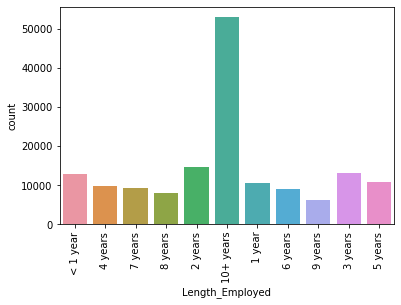

In [26]:
sns.countplot(dataset.Length_Employed)
plt.xticks(rotation=90)

In [27]:
#since it is a ordinal one we will convert it into numeric value and the missing one we will put it as zero
data={'< 1 year':1, '4 years':4, '7 years':7, '8 years':8, '2 years':2,
       '10+ years':10, '1 year':1, '6 years':6, '9 years':9, '3 years':3,
       '5 years':5}

dataset['Length_Employed']=dataset['Length_Employed'].map(data)
dataset['Length_Employed']=dataset['Length_Employed'].fillna(0)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

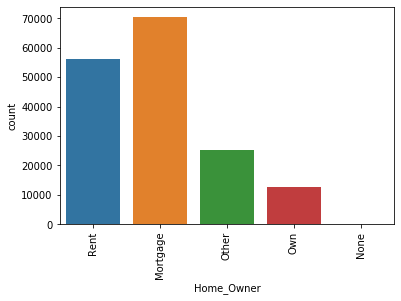

In [30]:
# Home OWNER
sns.countplot(dataset.Home_Owner)
plt.xticks(rotation=90)

In [29]:
# we can combine other and none together
dataset['Home_Owner']=dataset['Home_Owner'].fillna('Other')


In [38]:
dataset['Purpose_Of_Loan'].unique()

array(['car', 'debt_consolidation', 'credit_card', 'home_improvement',
       'major_purchase', 'other', 'medical', 'small_business', 'moving',
       'wedding', 'vacation', 'house', 'educational', 'renewable_energy'],
      dtype=object)

In [31]:
#dataset months dilequency 50 percent of the values are missings
dataset['Months_Since_Deliquency']=dataset['Months_Since_Deliquency'].fillna(0)

Interest rate :
    There are basically three categories of interest rate. 
    1. The nominal interest rate: 
        The nominal interest of an investment or loan is simply the stated rate on which interest payments are calculated. 
    2. The effective rate:
        The effective interest rate (AER) takes into account compounding over the full term of the investment.
        It is often used to compare the annual interest rates with different compounding terms (daily, monthly, annually, etc.). 
    3. real interest rate
        the real interest rate is useful when considering the impact of inflation on nominal interest rates. 
        In essence, the real interest rate deducts the rate of inflation from the nominal interest rate.

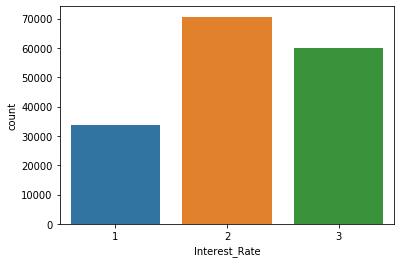

In [9]:
sns.countplot(dataset['Interest_Rate'])

Most of them belong to the second category and comparitevely less number of people belong to the first category.

<Figure size 1800x1800 with 0 Axes>

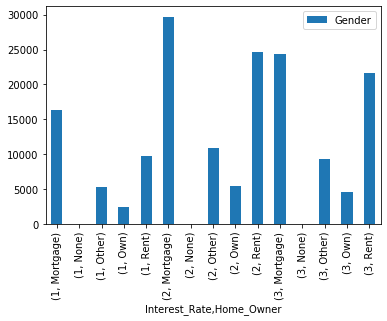

In [32]:
plt.figure(figsize=(25,25))
dataset.groupby(['Interest_Rate','Home_Owner']).count().plot(y=['Gender'],kind='bar')


(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.]),
 <a list of 10 Text xticklabel objects>)

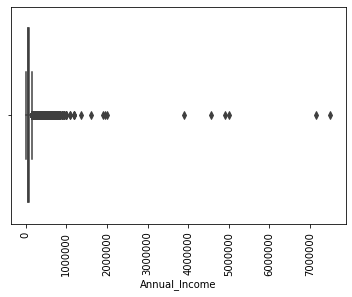

In [33]:
sns.boxplot(dataset['Annual_Income'].dropna())
plt.xticks(rotation=90)

In [34]:
#since outliers are present we will fill using median
dataset['Annual_Income']=dataset['Annual_Income'].fillna(dataset['Annual_Income'].median())

In [63]:
# so lets check for the null values
dataset.isnull().mean()

Loan_ID                    0.0
Loan_Amount_Requested      0.0
Length_Employed            0.0
Home_Owner                 0.0
Annual_Income              0.0
Income_Verified            0.0
Purpose_Of_Loan            0.0
Debt_To_Income             0.0
Inquiries_Last_6Mo         0.0
Months_Since_Deliquency    0.0
Number_Open_Accounts       0.0
Total_Accounts             0.0
Gender                     0.0
Interest_Rate              0.0
dtype: float64

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.]),
 <a list of 10 Text xticklabel objects>)

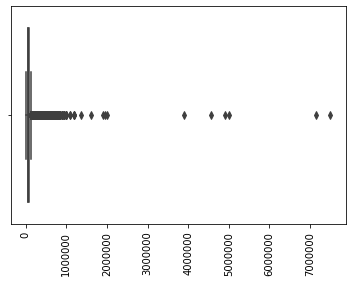

In [64]:
# checking for outliers
x1=dataset['Annual_Income']
x2=dataset['Number_Open_Accounts']
sns.boxplot([x1])

plt.xticks(rotation=90)

In [65]:
# someone having annual income of greater than 20,00,000 why would they apply for loans?
len(dataset[dataset['Annual_Income']>1000000])

16

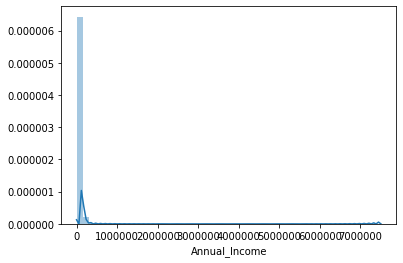

In [66]:
sns.distplot(dataset['Annual_Income'])
plt.xticks(rotation=90)

In [67]:
IQR = dataset.Annual_Income.quantile(0.75) - dataset.Annual_Income.quantile(0.25)

Lower_fence = dataset.Annual_Income.quantile(0.25) - (IQR * 1.5)
Upper_fence = dataset.Annual_Income.quantile(0.75) + (IQR * 1.5)


In [68]:
Upper_fence, Lower_fence, IQR

(132100.0, -1500.0, 33400.0)

In [69]:
# And if we are looking at really extreme values
# using the interquantile proximity rule

IQR = dataset.Annual_Income.quantile(0.75) - dataset.Annual_Income.quantile(0.25)

Lower_fence = dataset.Annual_Income.quantile(0.25) - (IQR * 3)
Upper_fence = dataset.Annual_Income.quantile(0.75) + (IQR * 3)

Upper_fence, Lower_fence, IQR

(182200.0, -51600.0, 33400.0)

In [72]:
#total customers having more than 182200 is 
len(dataset[dataset['Annual_Income']>182200])

0

In [71]:
# when having more than 15 lakhs annual salary the requested amount is very less so it is may be by mistake they added an extra 00 
# so we will divide by 10 here
dataset['Annual_Income']=dataset.Annual_Income.mask(dataset['Annual_Income']>182200,dataset['Annual_Income']/100)

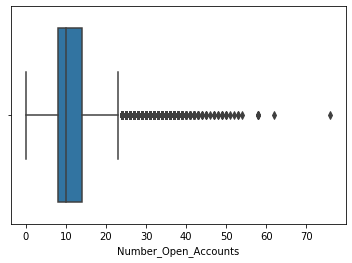

In [63]:
#  number of accounts
sns.boxplot(dataset['Number_Open_Accounts'])

In [66]:
IQR = dataset.Number_Open_Accounts.quantile(0.75) - dataset.Number_Open_Accounts.quantile(0.25)

Lower_fence = dataset.Number_Open_Accounts.quantile(0.25) - (IQR * 1.5)
Upper_fence = dataset.Number_Open_Accounts.quantile(0.75) + (IQR * 1.5)
Upper_fence, Lower_fence, IQR

(23.0, -1.0, 6.0)

In [67]:
#for extreme
IQR = dataset.Number_Open_Accounts.quantile(0.75) - dataset.Number_Open_Accounts.quantile(0.25)

Lower_fence = dataset.Number_Open_Accounts.quantile(0.25) - (IQR * 3)
Upper_fence = dataset.Number_Open_Accounts.quantile(0.75) + (IQR * 3)
Upper_fence, Lower_fence, IQR

(32.0, -10.0, 6.0)

In [73]:
dataset.to_csv('file1.csv') 